# Gold Price Prediction

# Business Objective:

Data provided is related to gold prices. The objective is to understand the underlying structure in your dataset and come up with a suitable forecasting model which can effectively forecast gold prices for next 30 days. This forecast model will be used by gold exporting and gold importing companies to understand the metal price movements and accordingly set their revenue expectations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
gold = pd.read_csv('C:/Users/hp/Downloads/Gold_data.csv')
gold

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [4]:
gold['date'] = pd.to_datetime(gold['date'])

In [5]:
gold.set_index('date',inplace=True)

In [6]:
gold

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [7]:
train = gold.head(1800)
test = gold.tail(2182-1800)

In [8]:
train

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2020-11-30,4230.60
2020-12-01,3559.60
2020-12-02,3582.10


In [9]:
test

,price
date,
2020-12-05,4113.1
2020-12-06,4222.5
2020-12-07,4341.7
2020-12-08,4593.8
2020-12-09,4579.2
...,...
2021-12-17,4394.4
2021-12-18,4389.5
2021-12-19,4389.5


<AxesSubplot:xlabel='date'>

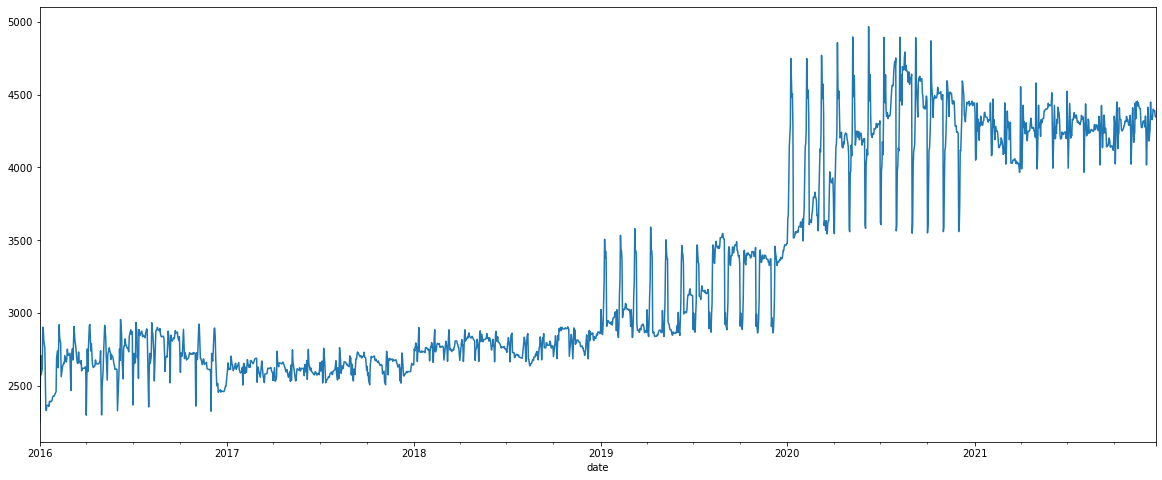

In [10]:
plt.figure(figsize=(20,8))
gold.price.plot()

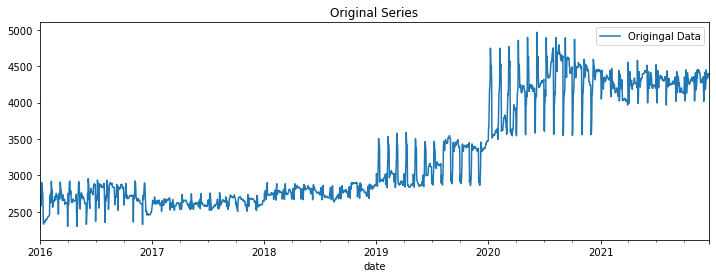

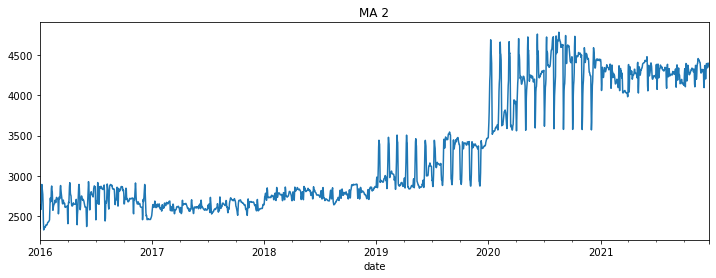

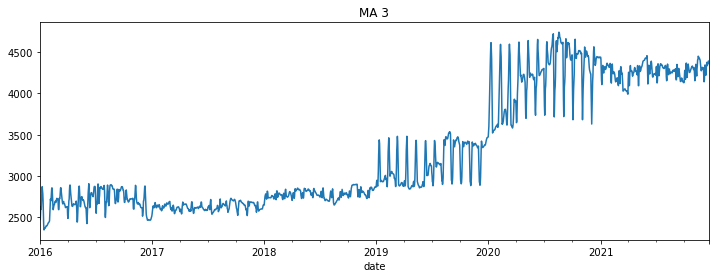

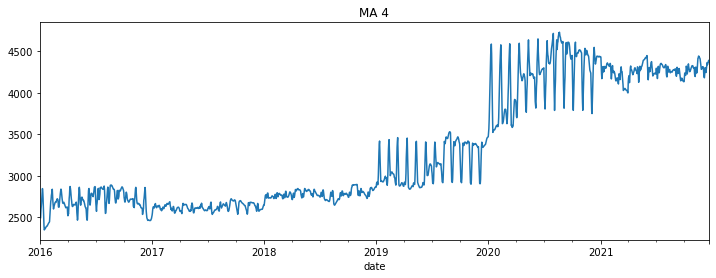

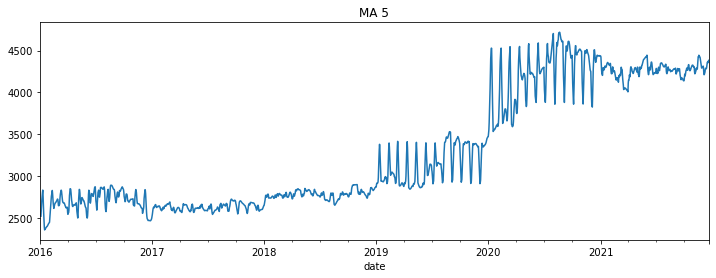

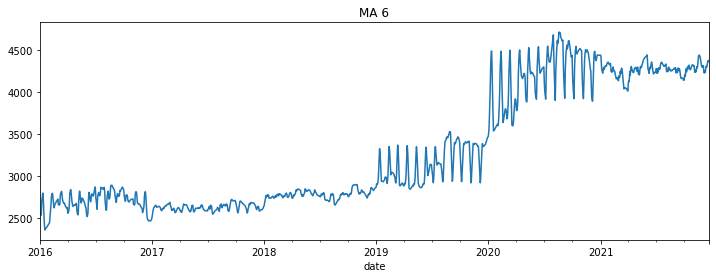

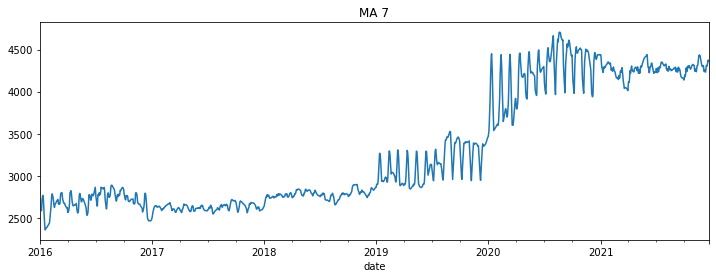

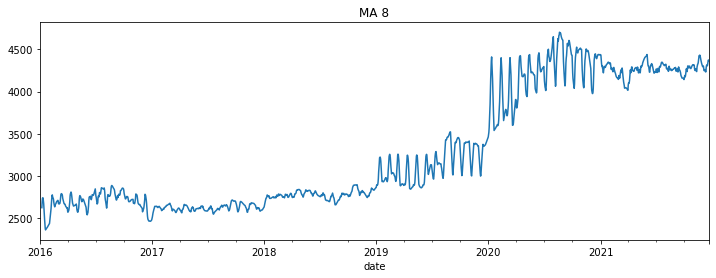

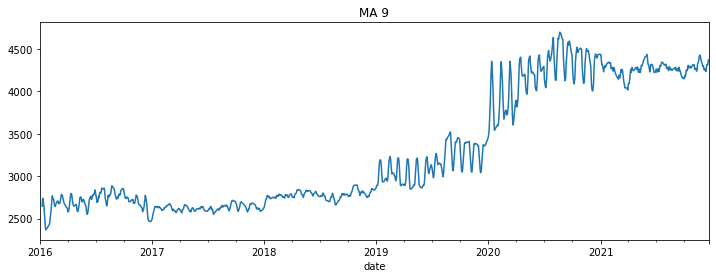

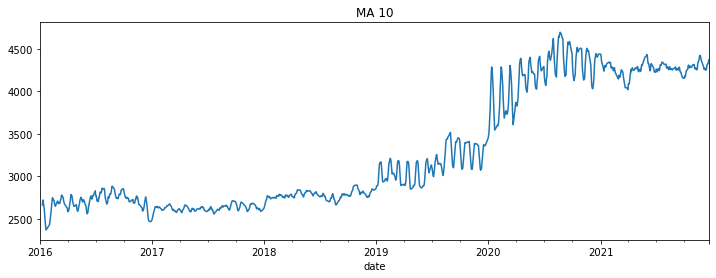

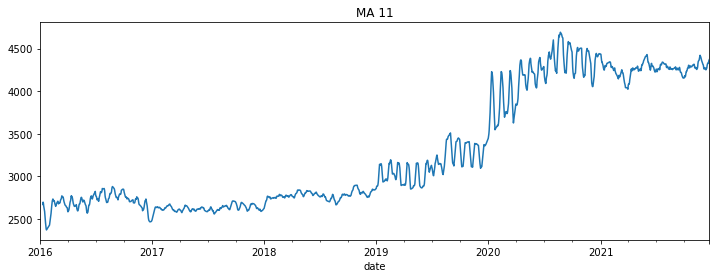

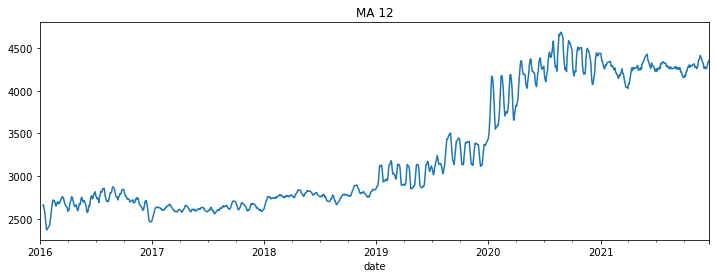

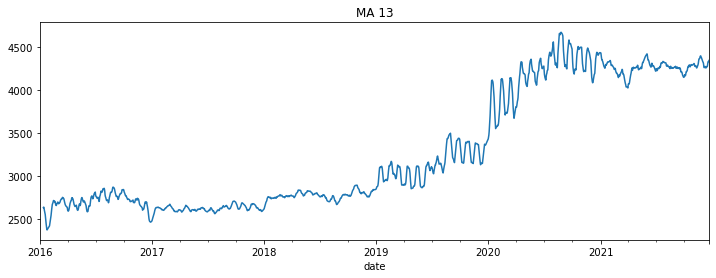

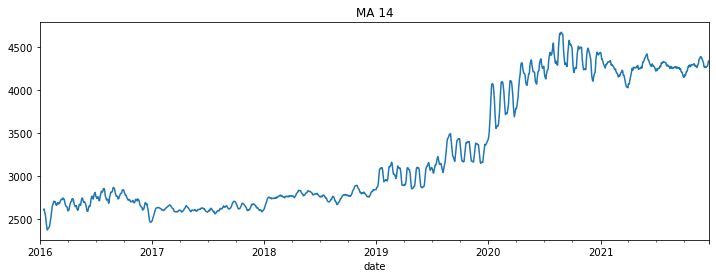

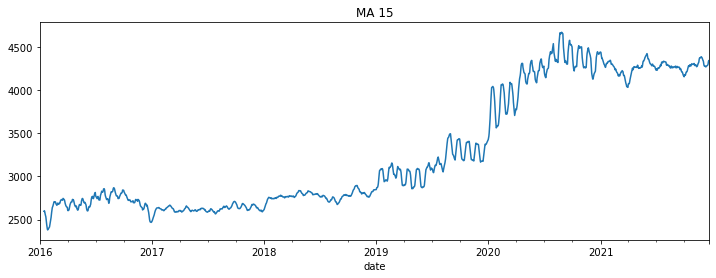

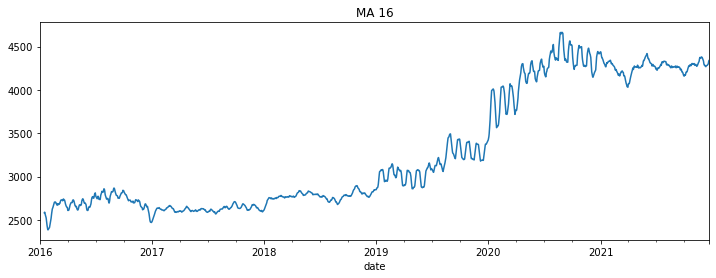

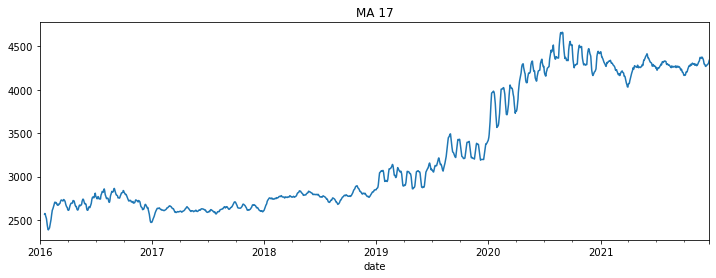

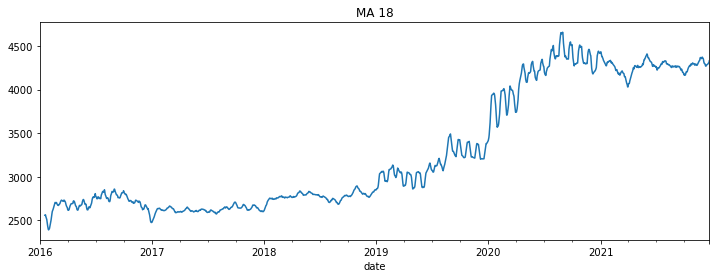

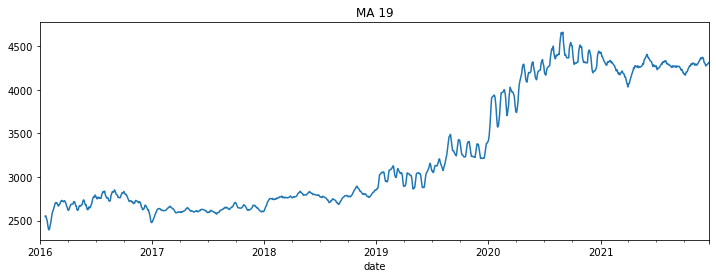

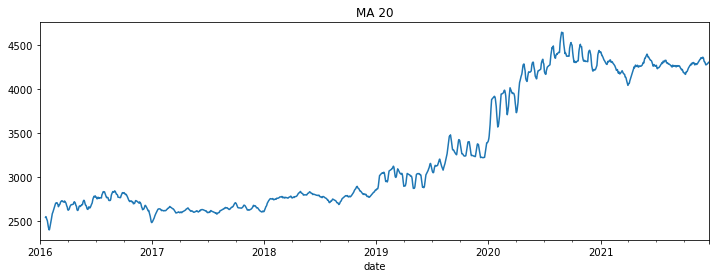

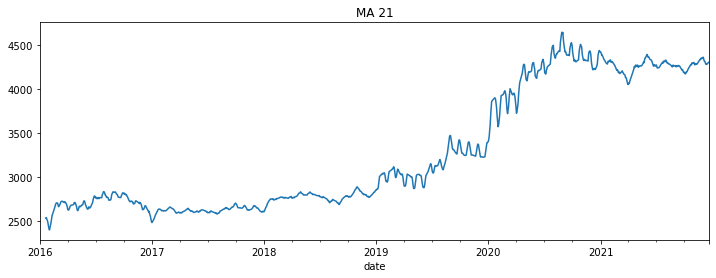

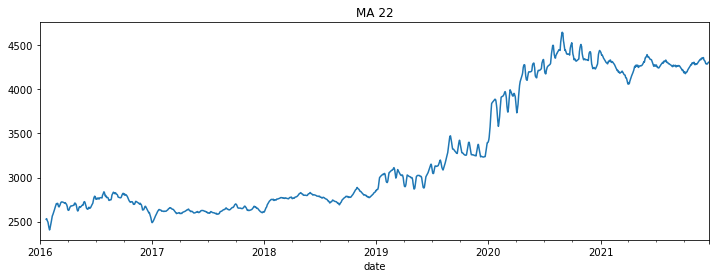

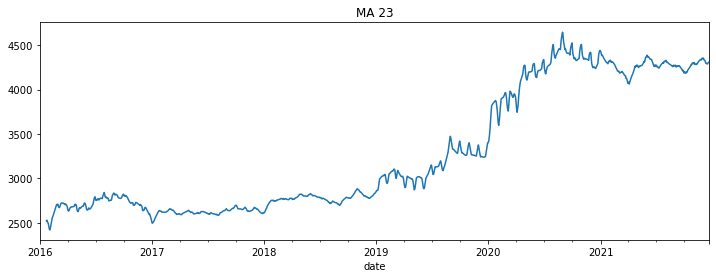

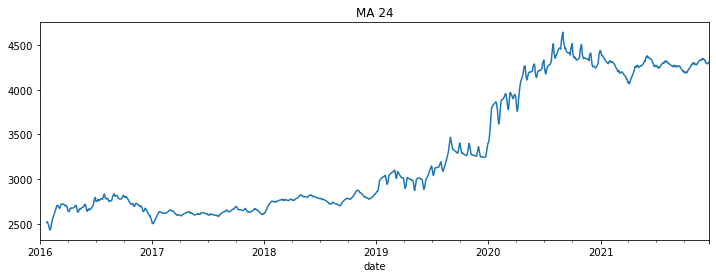

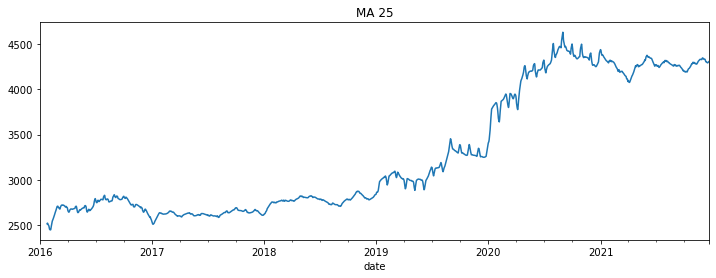

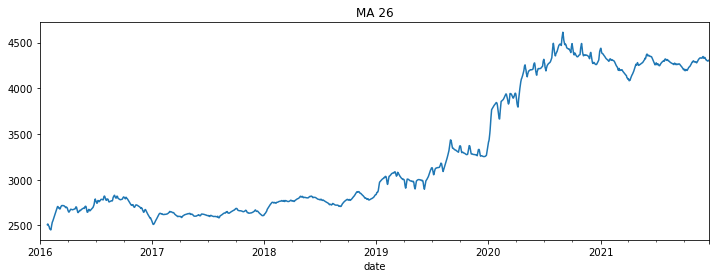

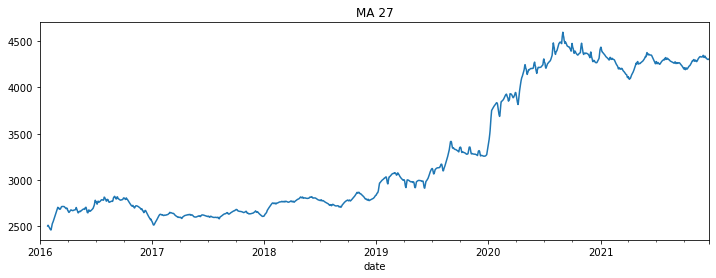

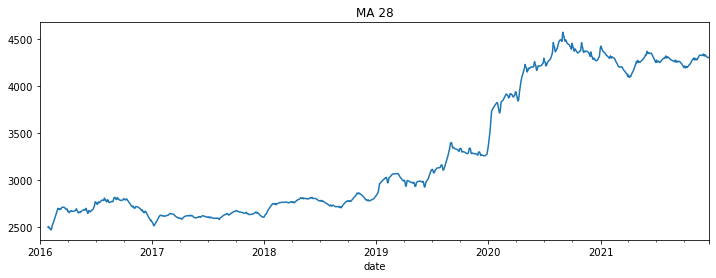

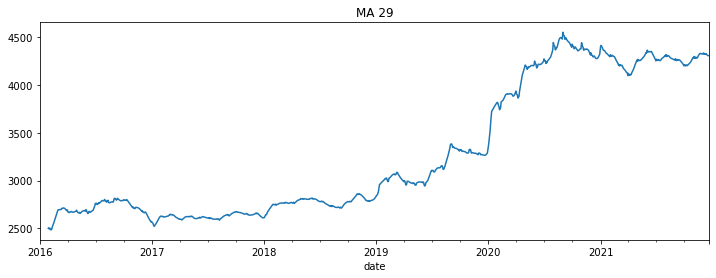

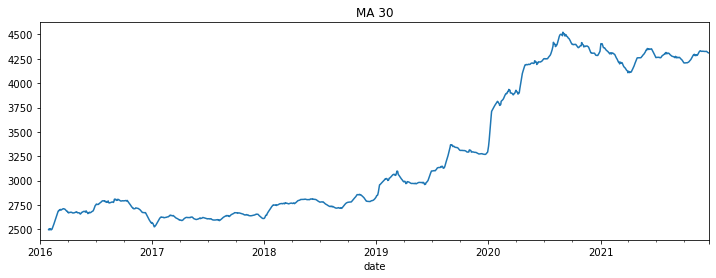

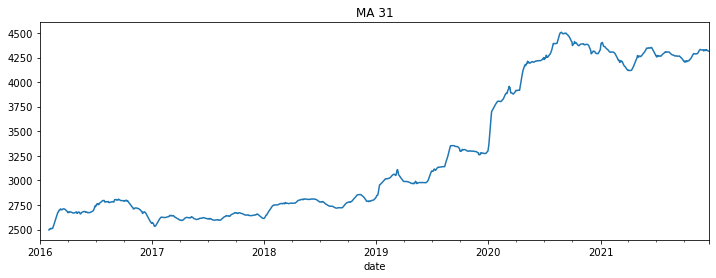

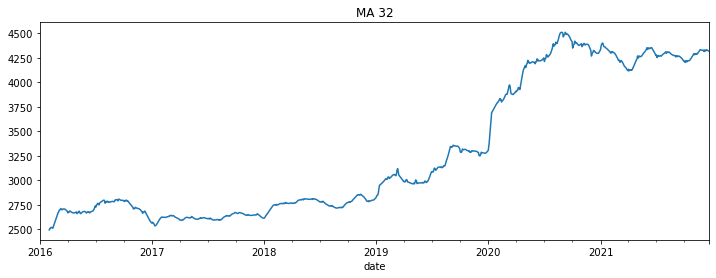

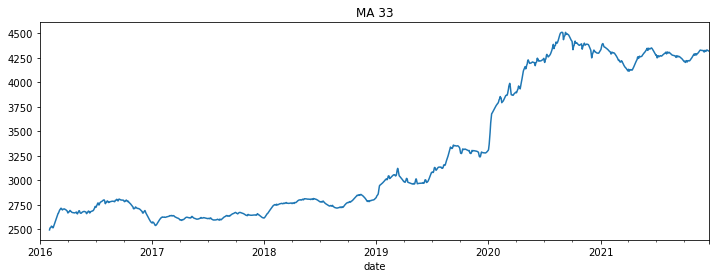

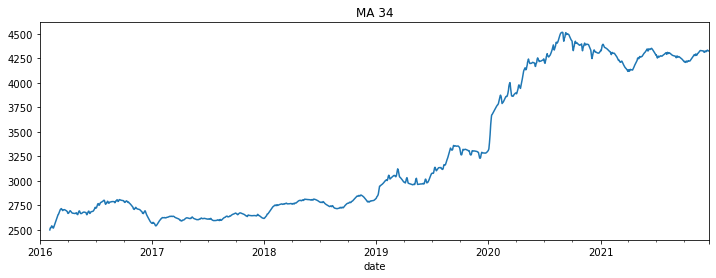

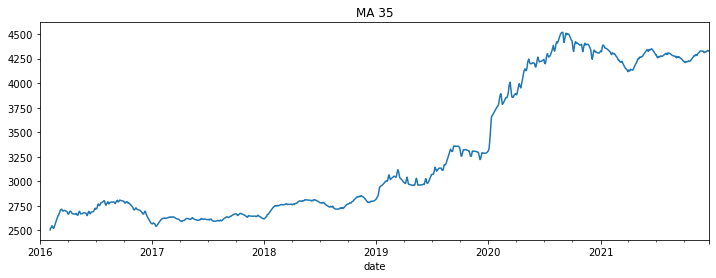

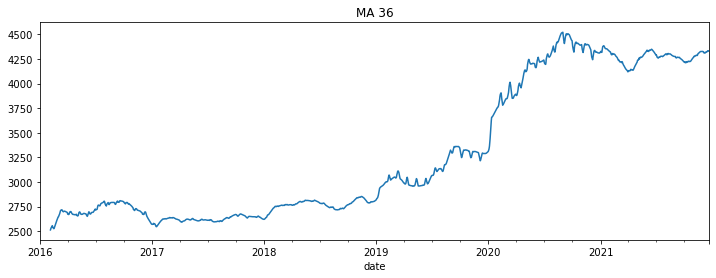

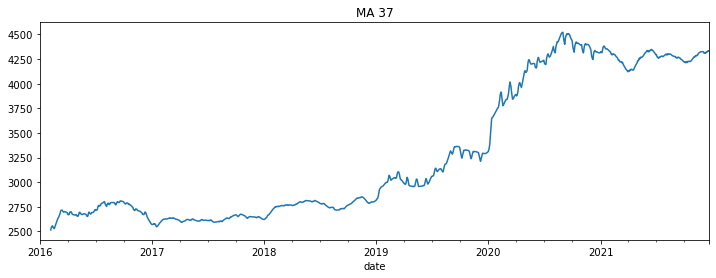

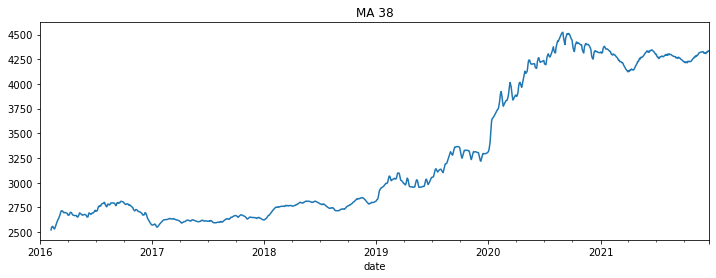

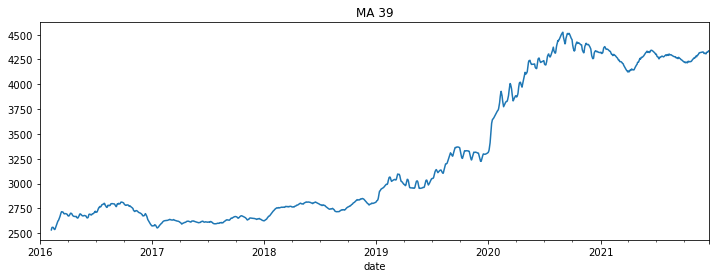

In [11]:
plt.figure(figsize=(12,4))
gold.price.plot(label='Origingal Data')
plt.legend(loc='best')
plt.title('Original Series')

for i in range(2,40):
    plt.figure(figsize=(12,4))
    
    
    gold['price'].rolling(i).mean().plot(label="MA "+str(i))
    plt.title('MA '+str(i))
    plt.show()
    

* By plotting we are getting Window Size of 30

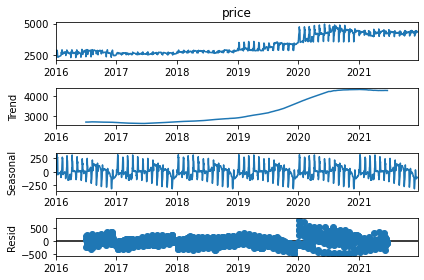

In [12]:
decompose = seasonal_decompose(gold.price,period=365)
decompose.plot()
plt.show()

In [13]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error

### Simple Exponential Forecasting:-

In [14]:
ses_model =SimpleExpSmoothing(train['price']).fit(smoothing_level=0.118)
s_pred = ses_model.predict(start=test.index[0],end=test.index[-1])
mape_error = MAPE(s_pred,test['price'])
print('MAPE error is = ',np.round( mape_error,2))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MAPE error is =  0.04


In [15]:
# Finding the best smoothing level for least MAPE score
x = np.linspace(0.1,1,50)
for i in x:
    ses_model = SimpleExpSmoothing(train['price']).fit(smoothing_level=i)
    s_pred = ses_model.predict(start=test.index[0],end=test.index[-1])
    mape_error = MAPE(s_pred, test['price'])
    print('Smoothing Level--->', i ,'MAPE error',np.round( mape_error,2) )

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Smoothing Level---> 0.1 MAPE error 0.04
Smoothing Level---> 0.11836734693877551 MAPE error 0.04
Smoothing Level---> 0.13673469387755102 MAPE error 0.05
Smoothing Level---> 0.15510204081632656 MAPE error 0.06
Smoothing Level---> 0.17346938775510207 MAPE error 0.06
Smoothing Level---> 0.19183673469387758 MAPE error 0.07
Smoothing Level---> 0.21020408163265308 MAPE error 0.07
Smoothing Level---> 0.2285714285714286 MAPE error 0.08
Smoothing Level---> 0.2469387755102041 MAPE error 0.08
Smoothing Level---> 0.2653061224489796 MAPE error 0.08
Smoothing Level---> 0.2836734693877551 MAPE error 0.08
Smoothing Level---> 0.3020408163265306 MAPE error 0.09
Smoothing Level---> 0.3204081632653062 MAPE error 0.09
Smoothing Level---> 0.3387755102040817 MAPE error 0.09


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Smoothing Level---> 0.3571428571428572 MAPE error 0.09
Smoothing Level---> 0.3755102040816327 MAPE error 0.09
Smoothing Level---> 0.3938775510204082 MAPE error 0.09
Smoothing Level---> 0.41224489795918373 MAPE error 0.09
Smoothing Level---> 0.43061224489795924 MAPE error 0.09
Smoothing Level---> 0.44897959183673475 MAPE error 0.09
Smoothing Level---> 0.46734693877551026 MAPE error 0.09
Smoothing Level---> 0.48571428571428577 MAPE error 0.09
Smoothing Level---> 0.5040816326530613 MAPE error 0.09
Smoothing Level---> 0.5224489795918368 MAPE error 0.09
Smoothing Level---> 0.5408163265306123 MAPE error 0.09
Smoothing Level---> 0.5591836734693878 MAPE error 0.08
Smoothing Level---> 0.5775510204081633 MAPE error 0.08
Smoothing Level---> 0.5959183673469388 MAPE error 0.08
Smoothing Level---> 0.6142857142857143 MAPE error 0.08


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Smoothing Level---> 0.6326530612244898 MAPE error 0.08
Smoothing Level---> 0.6510204081632653 MAPE error 0.08
Smoothing Level---> 0.6693877551020408 MAPE error 0.07
Smoothing Level---> 0.6877551020408164 MAPE error 0.07
Smoothing Level---> 0.7061224489795919 MAPE error 0.07
Smoothing Level---> 0.7244897959183674 MAPE error 0.07
Smoothing Level---> 0.7428571428571429 MAPE error 0.07
Smoothing Level---> 0.7612244897959184 MAPE error 0.06
Smoothing Level---> 0.7795918367346939 MAPE error 0.06
Smoothing Level---> 0.7979591836734694 MAPE error 0.06
Smoothing Level---> 0.8163265306122449 MAPE error 0.06
Smoothing Level---> 0.8346938775510204 MAPE error 0.06
Smoothing Level---> 0.8530612244897959 MAPE error 0.05
Smoothing Level---> 0.8714285714285714 MAPE error 0.05
Smoothing Level---> 0.889795918367347 MAPE error 0.05
Smoothing Level---> 0.9081632653061225 MAPE error 0.05
Smoothing Level---> 0.926530612244898 MAPE error 0.05
Smoothing Level---> 0.9448979591836735 MAPE error 0.05
Smoothing Le

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [16]:
ses_final_model = SimpleExpSmoothing(gold['price']).fit(smoothing_level=0.118)
final_prediction_ses = np.round(ses_final_model.forecast(365),2)
final_prediction_ses_df = pd.DataFrame(final_prediction_ses,columns=['price'])

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

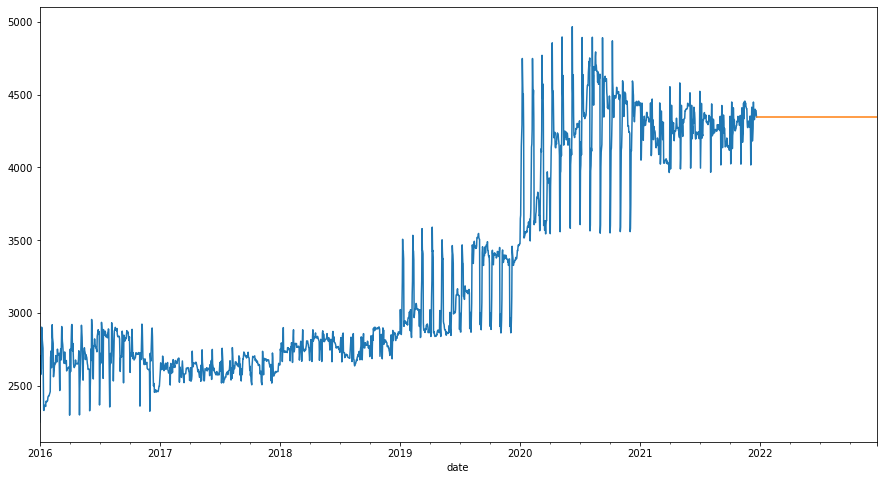

In [17]:
plt.figure(figsize=(15,8))
gold.price.plot()
final_prediction_ses_df.price.plot()

### Double Exponential Forecasting:-

In [18]:
des_model = Holt(gold['price']).fit(smoothing_trend=0.37,smoothing_level=0.1)
d_pred = des_model.predict(start=test.index[0],end=test.index[-1])
score = MAPE(d_pred,test['price'])
print('MAPE score for Double Exponential Forecasting --->',score)

MAPE score for Double Exponential Forecasting ---> 0.02357171296658243


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [19]:
# Finding best alphas and betas for the Double Exponential Smoothing:-
alphas = np.arange(0.1,1,0.09)
betas = np.arange(0.1,1,0.09)
l=[]
for i in alphas:
    for j in betas:
        des_model = Holt(train['price']).fit(smoothing_level=i,smoothing_slope=j)
        d_pred = des_model.predict(start=test.index[0],end=test.index[-1])
        score=MAPE(d_pred,test['price'])
        print('Smoothing Level',i,'Smoothing Slope',j,'MAPE Error-->',score)
        l.append((i,j,score))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.1 Smoothing Slope 0.1 MAPE Error--> 7.168771682500835
Smoothing Level 0.1 Smoothing Slope 0.19 MAPE Error--> 4.092880503907558
Smoothing Level 0.1 Smoothing Slope 0.28 MAPE Error--> 2.830912411432569
Smoothing Level 0.1 Smoothing Slope 0.37 MAPE Error-->

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


 2.2959938434338563
Smoothing Level 0.1 Smoothing Slope 0.45999999999999996 MAPE Error--> 4.1553364100773456
Smoothing Level 0.1 Smoothing Slope 0.5499999999999999 MAPE Error--> 2.9303960304514245


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.1 Smoothing Slope 0.64 MAPE Error--> 3.376754372647971
Smoothing Level 0.1 Smoothing Slope 0.73 MAPE Error--> 3.5086577864372033
Smoothing Level 0.1 Smoothing Slope 0.82 MAPE Error--> 8.788991458310115
Smoothing Level 0.1 Smoothing Slope 0.9099999999999999 MAPE Error--> 4.163219955313149


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.19 Smoothing Slope 0.1 MAPE Error--> 4.898411628427685
Smoothing Level 0.19 Smoothing Slope 0.19 MAPE Error--> 21.94033430932556
Smoothing Level 0.19 Smoothing Slope 0.28 MAPE Error--> 2.963588073447419


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.19 Smoothing Slope 0.37 MAPE Error--> 3.519400093148544
Smoothing Level 0.19 Smoothing Slope 0.45999999999999996 MAPE Error--> 3.3860768640117356
Smoothing Level 0.19 Smoothing Slope 0.5499999999999999 MAPE Error--> 3.7201369316266644


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.19 Smoothing Slope 0.64 MAPE Error--> 37.091325219714605
Smoothing Level 0.19 Smoothing Slope 0.73 MAPE Error--> 2.575877721247244
Smoothing Level 0.19 Smoothing Slope 0.82 MAPE Error--> 2.8196823914948626


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.19 Smoothing Slope 0.9099999999999999 MAPE Error--> 3.281579679950865
Smoothing Level 0.28 Smoothing Slope 0.1 MAPE Error--> 6.772333469125476
Smoothing Level 0.28 Smoothing Slope 0.19 MAPE Error--> 4.114099604880545


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.28 Smoothing Slope 0.28 MAPE Error--> 4.099878714114657
Smoothing Level 0.28 Smoothing Slope 0.37 MAPE Error--> 4.30875430468929
Smoothing Level 0.28 Smoothing Slope 0.45999999999999996 MAPE Error--> 13.121712399112136


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.28 Smoothing Slope 0.5499999999999999 MAPE Error--> 4.345052984107776
Smoothing Level 0.28 Smoothing Slope 0.64 MAPE Error--> 4.4010463276305485
Smoothing Level 0.28 Smoothing Slope 0.73 MAPE Error--> 11.525325506741304


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.28 Smoothing Slope 0.82 MAPE Error--> 9.679202979265936
Smoothing Level 0.28 Smoothing Slope 0.9099999999999999 MAPE Error--> 0.5698280105848409
Smoothing Level 0.37 Smoothing Slope 0.1 MAPE Error--> 9.295042838810344


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.37 Smoothing Slope 0.19 MAPE Error--> 3.9290713532810844
Smoothing Level 0.37 Smoothing Slope 0.28 MAPE Error--> 4.445743634387807
Smoothing Level 0.37 Smoothing Slope 0.37 MAPE Error--> 4.706874551606796


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.37 Smoothing Slope 0.45999999999999996 MAPE Error--> 6.177954476074855
Smoothing Level 0.37 Smoothing Slope 0.5499999999999999 MAPE Error--> 13.075010018090554


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.37 Smoothing Slope 0.64 MAPE Error--> 0.10063552871305782
Smoothing Level 0.37 Smoothing Slope 0.73 MAPE Error--> 0.4574222976288936


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.37 Smoothing Slope 0.82 MAPE Error--> 0.6100090538030009
Smoothing Level 0.37 Smoothing Slope 0.9099999999999999 MAPE Error--> 0.6990185079213248


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.45999999999999996 Smoothing Slope 0.1 MAPE Error--> 6.409243321248179
Smoothing Level 0.45999999999999996 Smoothing Slope 0.19 MAPE Error--> 4.481435370880585


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.45999999999999996 Smoothing Slope 0.28 MAPE Error--> 7.98308999333186
Smoothing Level 0.45999999999999996 Smoothing Slope 0.37 MAPE Error--> 9.533676813083892


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.45999999999999996 Smoothing Slope 0.45999999999999996 MAPE Error--> 0.10165090565941036
Smoothing Level 0.45999999999999996 Smoothing Slope 0.5499999999999999 MAPE Error--> 0.49400008570376824
Smoothing Level 0.45999999999999996 Smoothing Slope 0.64 MAPE Error--> 0.6458471297085888


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.45999999999999996 Smoothing Slope 0.73 MAPE Error--> 0.7294702804286963
Smoothing Level 0.45999999999999996 Smoothing Slope 0.82 MAPE Error--> 0.7821975473548479
Smoothing Level 0.45999999999999996 Smoothing Slope 0.9099999999999999 MAPE Error--> 0.8182978561488539


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.5499999999999999 Smoothing Slope 0.1 MAPE Error--> 6.059932840798581
Smoothing Level 0.5499999999999999 Smoothing Slope 0.19 MAPE Error--> 6.457880373821438


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.5499999999999999 Smoothing Slope 0.28 MAPE Error--> 11.443869221336138
Smoothing Level 0.5499999999999999 Smoothing Slope 0.37 MAPE Error--> 0.26822263729706514


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.5499999999999999 Smoothing Slope 0.45999999999999996 MAPE Error--> 0.5680593662573183
Smoothing Level 0.5499999999999999 Smoothing Slope 0.5499999999999999 MAPE Error--> 0.6943521334339166
Smoothing Level 0.5499999999999999 Smoothing Slope 0.64 MAPE Error--> 0.7645472130155564


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.5499999999999999 Smoothing Slope 0.73 MAPE Error--> 0.809136519541391
Smoothing Level 0.5499999999999999 Smoothing Slope 0.82 MAPE Error--> 0.8398797268686152


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.5499999999999999 Smoothing Slope 0.9099999999999999 MAPE Error--> 0.8621058773367787
Smoothing Level 0.64 Smoothing Slope 0.1 MAPE Error--> 7.521856975505916
Smoothing Level 0.64 

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Slope 0.19 MAPE Error--> 10.057438222912133
Smoothing Level 0.64 Smoothing Slope 0.28 MAPE Error--> 0.18135987543553278
Smoothing Level 0.64 Smoothing Slope 0.37 MAPE Error--> 0.5545848297197548
Smoothing Level 0.64 Smoothing Slope 0.45999999999999996 MAPE Error--> 0.6950855746674284


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Smoothing Level 0.64 Smoothing Slope 0.5499999999999999 MAPE Error--> 0.7689490630913994
Smoothing Level 0.64 Smoothing Slope 0.64 MAPE Error--> 0.8143142337729605
Smoothing Level 0.64 Smoothing Slope 0.73 MAPE Error--> 0.8448340830556433
Smoothing Level 0.64 Smoothing Slope 0.82 MAPE Error--> 0.8662784855367222


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.64 Smoothing Slope 0.9099999999999999 MAPE Error--> 0.8818438211414255
Smoothing Level 0.73 Smoothing Slope 0.1 MAPE Error--> 14.396604287775356
Smoothing Level 0.73 Smoothing Slope 0.19 MAPE Error--> 0.35515295615109876
Smoothing Level 0.73 Smoothing Slope 0.28 MAPE Error--> 0.46139012837802756


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.73 Smoothing Slope 0.37 MAPE Error--> 0.6603746653853371
Smoothing Level 0.73 Smoothing Slope 0.45999999999999996 MAPE Error--> 0.7527186023491669
Smoothing Level 0.73 Smoothing Slope 0.5499999999999999 MAPE Error--> 0.8056630051612742
Smoothing Level 0.73 Smoothing Slope 0.64 MAPE Error--> 0.8395392141767162


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.73 Smoothing Slope 0.73 MAPE Error--> 0.8624542633645293
Smoothing Level 0.73 Smoothing Slope 0.82 MAPE Error--> 0.8785722477439618
Smoothing Level 0.73 Smoothing Slope 0.9099999999999999 MAPE Error--> 0.8901724964918832
Smoothing Level 0.82 Smoothing Slope 0.1 MAPE Error--> 65.73907364127253


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.82 Smoothing Slope 0.19 MAPE Error--> 0.19668219032664286
Smoothing Level 0.82 Smoothing Slope 0.28 MAPE Error--> 0.5747540575657909
Smoothing Level 0.82 Smoothing Slope 0.37 MAPE Error--> 0.7133523857626773
Smoothing Level 0.82 Smoothing Slope 0.45999999999999996 MAPE Error--> 0.7836816981784083
Smoothing Level 0.82 Smoothing Slope 0.5499999999999999 MAPE Error--> 0.8254780672319918


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

Smoothing Level 0.82 Smoothing Slope 0.64 MAPE Error--> 0.8523802471590427
Smoothing Level 0.82 Smoothing Slope 0.73 MAPE Error--> 0.8705698436878672
Smoothing Level 0.82 Smoothing Slope 0.82 MAPE Error--> 0.8832035534034853
Smoothing Level 0.82 Smoothing Slope 0.9099999999999999 MAPE Error--> 0.892047795670631


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.9099999999999999 Smoothing Slope 0.1 MAPE Error--> 0.7071240050424024
Smoothing Level 0.9099999999999999 Smoothing Slope 0.19 MAPE Error--> 0.37146711389024356
Smoothing Level 0.9099999999999999 Smoothing Slope 0.28 MAPE Error--> 0.6346982013616713
Smoothing Level 0.9099999999999999 Smoothing Slope 0.37 MAPE Error--> 0.7435441230628618


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.9099999999999999 Smoothing Slope 0.45999999999999996 MAPE Error--> 0.8012924778716543
Smoothing Level 0.9099999999999999 Smoothing Slope 0.5499999999999999 MAPE Error--> 0.8360000728039526
Smoothing Level 0.9099999999999999 Smoothing Slope 0.64 MAPE Error--> 0.85835879051026


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.9099999999999999 Smoothing Slope 0.73 MAPE Error--> 0.873332116916841
Smoothing Level 0.9099999999999999 Smoothing Slope 0.82 MAPE Error--> 0.8835125492615262


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Smoothing Level 0.9099999999999999 Smoothing Slope 0.9099999999999999 MAPE Error--> 0.890387755738678


In [20]:
des_final_model = Holt(gold['price']).fit(smoothing_trend=0.37,smoothing_level=0.1)
final_prediction_des = np.round(des_final_model.forecast(30),2)
final_prediction_des_df = pd.DataFrame(final_prediction_des,columns=['price'])

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='date'>

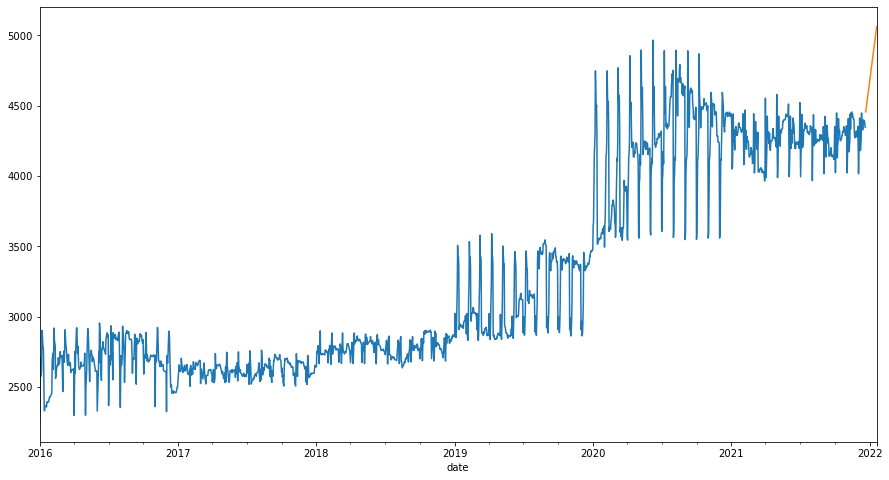

In [21]:
plt.figure(figsize=(15,8))
gold.price.plot()
final_prediction_des_df.price.plot()

### Holt-Winter's Forecasting:-

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
hwf_model = ExponentialSmoothing(gold['price'],trend='add',seasonal='mul',seasonal_periods=365).fit()
hwf_pred = hwf_model.predict(start=test.index[0],end=test.index[-1])
score = MAPE(hwf_pred,test['price'])
print('MAPE score for HOLT WINTERS MODEL is',score)

MAPE score for HOLT WINTERS MODEL is 0.015455676691639535


### Final Prediction  using the Holt Winter's Method for next 30 days:-

In [24]:
hwf_final_model = ExponentialSmoothing(gold['price'],trend='add',seasonal='mul',seasonal_periods=365).fit()
final_prediction = np.round(hwf_final_model.forecast(30),2)
final_prediction_df = pd.DataFrame(final_prediction,columns=['price'])


In [25]:
final_prediction_df

,price
2021-12-22,4323.20
2021-12-23,4325.88
2021-12-24,4310.97
2021-12-25,4299.41
2021-12-26,4300.42
2021-12-27,4295.49
2021-12-28,4268.55
2021-12-29,4254.29
2021-12-30,4230.12
2021-12-31,4307.98


<AxesSubplot:xlabel='date'>

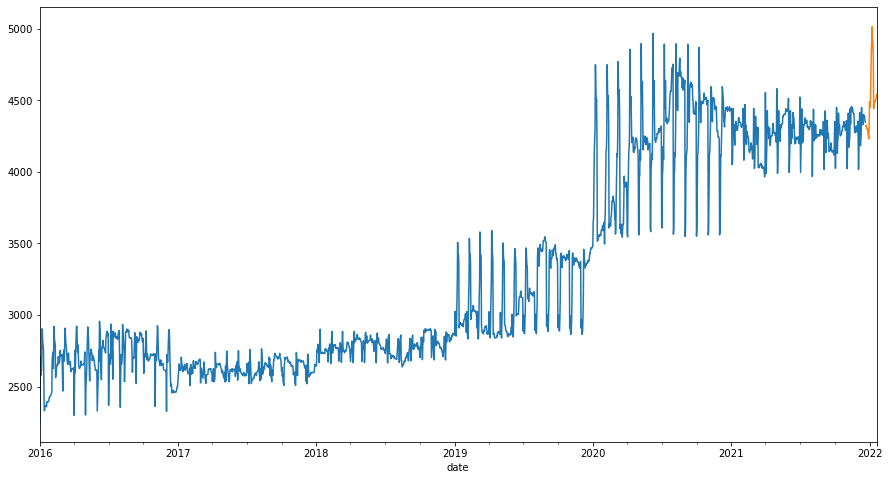

In [26]:
plt.figure(figsize=(15,8))
gold.price.plot()
final_prediction_df.price.plot()

<AxesSubplot:title={'center':'21-22'}>

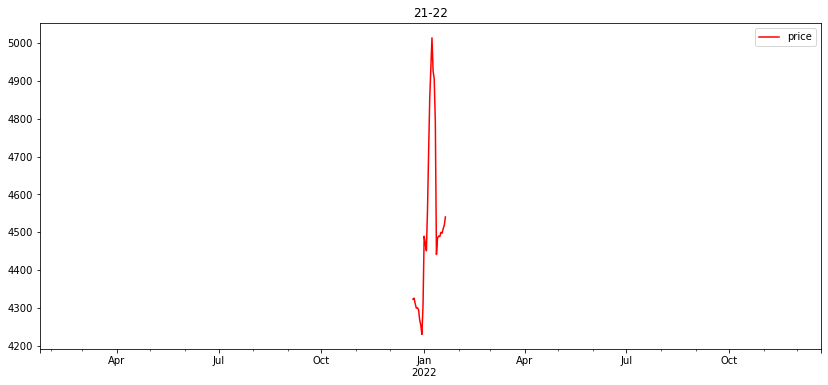

In [27]:
final_prediction_df.plot(xlim=['2021-01-22','2022-12-22'],c='red',title='21-22',figsize=(14,6))

<AxesSubplot:>

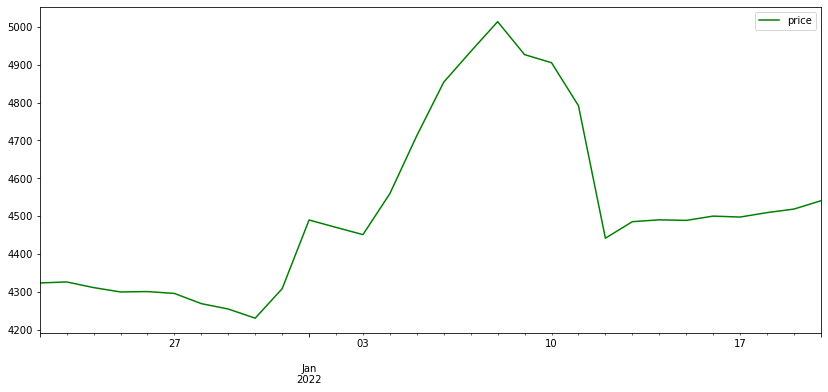

In [28]:
final_prediction_df.plot(figsize=(14,6),c='green')

In [29]:
final_prediction_df.describe()

,price
count,30.000000
mean,4516.479333
std,227.578502
min,4230.120000
25%,4314.027500
50%,4489.030000
75%,4554.677500
max,5013.650000


* Plot for price from 2021 to 2022 including the forecasted 30 days.

In [30]:
gold

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


### Deployment

In [31]:
import pickle
from pickle import dump
from pickle import load

In [32]:
dump(hwf_final_model,open('model.sav','wb'))

In [33]:
loaded_model=load(open('model.sav','rb'))

In [34]:
# Using loaded model to forecast 30 days gold prices
result=loaded_model.forecast(30)
result

2021-12-22    4323.202503
2021-12-23    4325.884216
2021-12-24    4310.967932
2021-12-25    4299.411699
2021-12-26    4300.420295
2021-12-27    4295.490564
2021-12-28    4268.546411
2021-12-29    4254.289546
2021-12-30    4230.119839
2021-12-31    4307.984792
2022-01-01    4489.546795
2022-01-02    4470.053419
2022-01-03    4450.901017
2022-01-04    4559.432310
2022-01-05    4712.510161
2022-01-06    4853.889201
2022-01-07    4934.747305
2022-01-08    5013.646367
2022-01-09    4926.549201
2022-01-10    4905.198188
2022-01-11    4791.530538
2022-01-12    4441.397379
2022-01-13    4485.095138
2022-01-14    4489.991490
2022-01-15    4488.513124
2022-01-16    4499.825063
2022-01-17    4497.321466
2022-01-18    4509.079142
2022-01-19    4518.408139
2022-01-20    4540.422548
Freq: D, dtype: float64

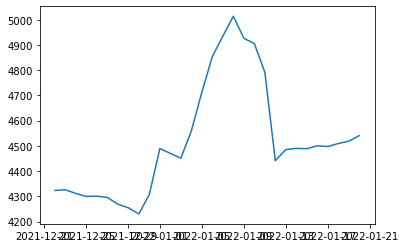

In [35]:
plt.plot(result)

In [36]:
!streamlit run app.py

2022-11-02 14:04:03.869 INFO    numexpr.utils: NumExpr defaulting to 4 threads.
Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
